## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#print(mouse_metadata.columns,study_results.columns), used this to determine the shared data column

# Combine the data into a single dataset
merge_df=pd.merge(mouse_metadata,study_results).sort_values('Tumor Volume (mm3)')
# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
7,k403,Ramicane,Male,21,16,35,26.546993,1


In [4]:
# Checking the number of mice.
#checking for the unique number of mice(no duplicate IDs)
unique_mice = len(merge_df['Mouse ID'].unique())
#just counting all rows, regardless of duplicates
mice_count=merge_df['Mouse ID'].count()
print('the number of unique mice is : '+ str(unique_mice))
print('the total count regardless of duplicates is ' + str(mice_count))

the number of unique mice is : 249
the total count regardless of duplicates is 1893


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice=merge_df.duplicated(['Mouse ID','Timepoint'],keep="first")
dup_mice

9       False
19      False
8       False
18      False
7       False
        ...  
1571    False
1179    False
1354    False
1152    False
1277    False
Length: 1893, dtype: bool

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_df=merge_df[dup_mice]
dup_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merge_df2=merge_df.drop_duplicates(['Mouse ID','Timepoint'], keep='last')
merge_df2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
...,...,...,...,...,...,...,...,...
1571,t724,Naftisol,Female,2,25,45,75.113288,2
1179,m269,Stelasyn,Female,22,28,45,75.123690,1
1354,p189,Ketapril,Male,8,28,45,75.294936,4
1152,l725,Naftisol,Female,8,26,45,76.668817,3


In [8]:
# Checking the number of mice in the clean DataFrame.
mice_count2=merge_df2['Mouse ID'].count()
mice_count2

1888

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
#Use the merge_df2 for this analysis
mean=pd.DataFrame(merge_df2.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean())
median=pd.DataFrame(merge_df2.groupby('Drug Regimen')['Tumor Volume (mm3)'].median())
variance=pd.DataFrame(merge_df2.groupby('Drug Regimen')['Tumor Volume (mm3)'].var())
tv_std=pd.DataFrame(merge_df2.groupby('Drug Regimen')['Tumor Volume (mm3)'].std())
tv_sem=pd.DataFrame(merge_df2.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem())
# Assemble the resulting series into a single summary dataframe. 
mouse_statistics = pd.concat([mean,median,variance,tv_std,tv_sem],axis=1)
#set column headers
mouse_statistics = mouse_statistics.set_axis(['Tumor Volume Mean','Tumor Volume Median','Tumor Volume Variance',
                                 'Tumor Volume Standard Deviation','Tumor Volume Standard Error of Mean'], axis=1)
mouse_statistics.head()

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [11]:
# Using the aggregation method, produce the same summary statistics in a single line
statistics_agg_df=merge_df2.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
statistics_agg_df.head()

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

## Bar and Pie Charts

Text(0, 0.5, 'Frequency')

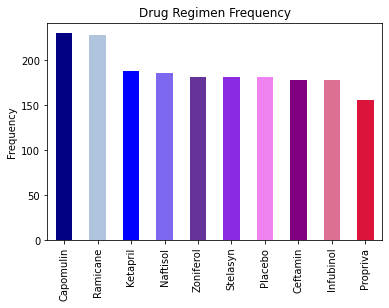

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#calculate the drug regimen count using value counts, showing how many times that drug showed up
dr_count = merge_df2['Drug Regimen'].value_counts()
#list of colors for bar chart
colors=('Navy','lightsteelblue','blue','mediumslateblue','rebeccapurple','blueviolet','violet','purple','palevioletred','crimson')
dr_regimen = dr_count.plot(kind='bar',title='Drug Regimen Frequency', color=colors)
dr_regimen.set_ylabel('Frequency')

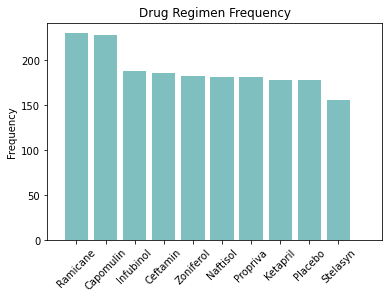

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#determine the list of drug regimen using the unique function
regimen_names = merge_df2['Drug Regimen'].unique()
#calculate how often each drug regimen shows up in the data
regimen_count = merge_df2['Drug Regimen'].value_counts()
x_axis = np.arange(len(regimen_count))
#generate the bar chart
plt.bar(x_axis,regimen_count, color = 'teal', alpha=0.5, align='center')
#format bar chart
ticks = [x for x in x_axis]
plt.xticks(ticks, regimen_names,rotation = 45)
plt.ylabel('Frequency')
plt.title('Drug Regimen Frequency')
plt.xlim(-1.0,len(x_axis)+.5)
plt.show()

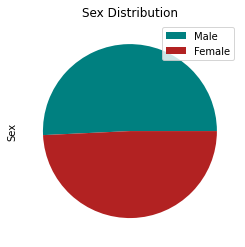

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#calculate count for each gender
gender = merge_df2['Sex'].value_counts()
#generate pie chart and format chart as needed
gender_pie = gender.plot.pie(title='Sex Distribution', colors=["teal","firebrick"],legend=True,textprops={'color':"w", 'size':15})

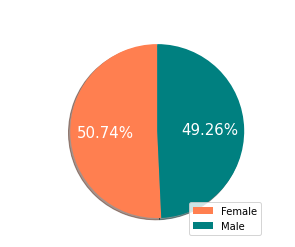

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#create the variables needed for the pie chart: labels, colors, x varibles used for the visualization
labels = ['Female','Male']
x = gender
colors = ['coral','teal']
#create pie chart using pyplot and format as needed
plt.pie(x,labels=labels,colors=colors,shadow=True,startangle=90,
        autopct="%1.2f%%",textprops={'color':"w", 'size':15})
plt.title('Sex Distribution',fontdict={'color':'white'})
plt.legend(labels,loc=4)
plt.show()

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#pull out those 4 drug regimans and create a df 
drugs=['Capomulin','Ramicane','Infubinol','Ceftamin']
drugs_df=merge_df2[merge_df2['Drug Regimen'].isin(drugs)]

# Start by getting the last (greatest) timepoint for each mouse
timepoint_df=drugs_df.groupby(['Drug Regimen', 'Mouse ID']).agg({'Timepoint':['max']})
timepoint_df

Timepoint
                            max
Drug Regimen Mouse ID          
Capomulin    b128            45
             b742            45
             f966            20
             g288            45
             g316            45
...                         ...
Ramicane     s508            45
             u196            45
             w678             5
             y449            15
             z578            45

[100 rows x 1 columns]

In [22]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
drugs_df2 = pd.merge(drugs_df,timepoint_df,on='Mouse ID')
drugs_df2.rename(columns={('Timepoint','max'):'Timepoint Max'}, inplace=True)
drugs_df2 = drugs_df2.loc[drugs_df2['Timepoint']==drugs_df2[('Timepoint Max')]]
drugs_df2

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Timepoint Max
0,k403,Ramicane,Male,21,16,45,22.050126,1,45
10,s185,Capomulin,Female,3,17,45,23.343598,1,45
21,x401,Capomulin,Female,16,15,45,28.484033,0,45
30,m601,Capomulin,Male,22,17,45,28.430964,1,45
40,g791,Ramicane,Male,11,16,45,29.128472,1,45
...,...,...,...,...,...,...,...,...,...
773,o813,Infubinol,Male,24,28,5,45.699331,0,5
783,z581,Infubinol,Female,24,25,45,62.754451,3,45
793,a203,Infubinol,Female,20,23,45,67.973419,2,45
803,a251,Infubinol,Female,21,25,45,65.525743,1,45


In [27]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Q1 = drugs_df2['Tumor Volume (mm3)'].quantile(.25)
Q3 = drugs_df2['Tumor Volume (mm3)'].quantile(.75)
IQR = Q3-Q1 
    
#calculate the lower and upper bounds
lower=Q1 - (1.5*IQR)
upper=Q3+ (1.5*IQR)
    
# Determine outliers using upper and lower bounds
drugs_df2[(drugs_df2['Tumor Volume (mm3)']<lower)|(drugs_df2['Tumor Volume (mm3)']>upper)] 
#when run, returns no results for outliers

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Timepoint Max


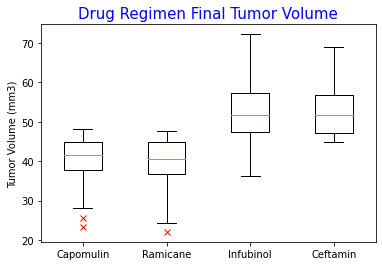

In [34]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
capomulin = merge_df.loc[merge_df['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane = merge_df.loc[merge_df['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol = merge_df.loc[merge_df['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin = merge_df.loc[merge_df['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']
drugs = ['Capomulin','Ramicane','Infubinol','Ceftamin']
plt.boxplot([capomulin,ramicane,infubinol,ceftamin],labels=drugs,flierprops={'marker':'x', 'markeredgecolor':'r'})
plt.title('Drug Regimen Final Tumor Volume',color='blue',fontsize=15)
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

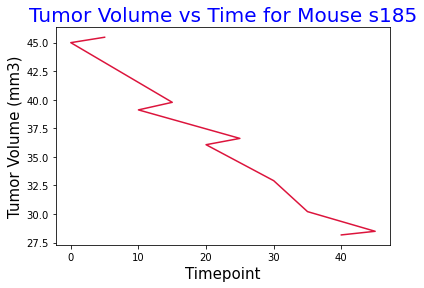

In [43]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#pull data for one mouse from the Capomulin drug regimen
capomulin_mouse = merge_df.loc[merge_df['Mouse ID'] == 'x401']
#generate line chart and format as needed
plt.plot(capomulin_mouse['Timepoint'],capomulin_mouse['Tumor Volume (mm3)'], color='crimson')
plt.xlabel('Timepoint',fontsize=15)
plt.ylabel('Tumor Volume (mm3)', fontsize=15)
plt.title('Tumor Volume vs Time for Mouse s185',fontsize=20, color='blue')
plt.show()

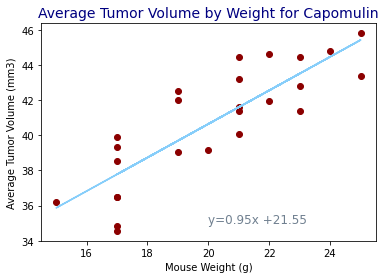

In [64]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#pull out the data for just the Capomulin drug regimen and then calculate the average tumor volume
capomulin_mice = merge_df.loc[merge_df['Drug Regimen'] == 'Capomulin']
avg_tumor = capomulin_mice.groupby(['Mouse ID']).mean()
avg_tumor.rename(columns={'Tumor Volume (mm3)':'Average Tumor Volume (mm3)'}, inplace=True)

#plot and format scatter plot
plt.scatter(avg_tumor['Weight (g)'],avg_tumor['Average Tumor Volume (mm3)'], color='darkred')
plt.xlabel('Mouse Weight (g)', fontsize=10)
plt.ylabel('Average Tumor Volume (mm3)',fontsize=10)
plt.title('Average Tumor Volume by Weight for Capomulin',fontsize=14, color='navy')
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#moved the code below into the same cell for the scatter plot as widget didn't work
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(avg_tumor['Weight (g)'],avg_tumor['Average Tumor Volume (mm3)'])
regression_line = avg_tumor['Weight (g)']*slope + intercept
#plot the regression line and format as needed
equation = 'y=' + str(round(slope,2))+"x +" + str(round(intercept,2))
plt.plot(avg_tumor['Weight (g)'],regression_line, color='lightskyblue')
plt.annotate(equation,(20,35),fontsize=12,color='slategrey')
plt.show()

## Correlation and Regression